# Applied Capstone Project

## Introduction

<br> A Restauant has always been a profiatable business investment considering its location, quality and types. From the start of 21st century, there has been lot of migrants from one country to another. Many Families from asian countries has been moving out of thier own countries due to lack of employment oppurtunities, lack of Industries and lack of job creation from their respective governments. </br>
<br> There were numerous reasons where government had not done enough for their people espicially South Asian Country like India. In terms of Education as well, there were not many colleges which can be competed with the World class education and te colleges which were better in terms of education, there addmission cannot be taken easily. So, many students started moving out of India to more developed countries like European Countries, Canada, Australia and America. So basically in last few decades Professionals in search of better job and better pay moved out of India. STudents moved for better quality of Education and many businessmen moved out of India for the sake of business friendly envirnment provided by the developed countries governments. </br>
<br> Thus the consistent emmigration movement from the countries like India, China led to opening of Indian and Chinese restaurants in many developed countries where one can easily get the food like their home country. These restaurants gained massive popularity in these developed countries because of their new taste and different kinds of food. For eg. From the Ancient times people in Europe did not like to eat spicy food. But after the introduction of Indian Restaurants in few cities of Europe, they got the new taste and they started liking the Indian food at times and Spiecier food. So these restaurants started gaining the backing from the local crowd as well. Fast Forward to 2019, many business minds, business enthusiasts people started looking to grab this oppurtunity by starting the new restaurant in European Cities. But they were not sure where to open these restaurants.</br>
<br> One such Client had this big question infront of him. The Client wanted to open a restaurant in either Budapest or Dublin. But he also wanted to choose from Dublin or Budapest where there are less Indian Restaurants but more Indian Population.The other condition for  him was to open in such a area where there are less Indian restaurants in a city. So to satisfy all his conditions, it is not possible to physically check all the conditions, now here comes the use of Machine Learning. Here in this case, the Machine Learning techniques will provide immense help in finding the best suitable location for opening the new Restaurant in either Dublin, Ireland or Budapest, Hungary. The Research question, ***Can the Machine Learning technique be used to determine which city is best for opening the new Indian Restaurant?*** Both the countries has their pros and cons in terms of Indian Population. So we will determine all these in the next section, where the Data which will be used for this problem will be describe and Four Square Location data will also be discussed. </br>

## Data Section

<br> The Data for this project will be used from two different sources. One data source is from Kaggle where th list of all restaurants in Budapest and Dublin are present. Another Data Source will be the FourSquare Location Data. This Data will give us the Lattitude and longitude of the particular restaurant which will be helpful for our further research. To determine which city is best for opening the new restaurant, both these datasets will play the major role in this project.</br> 

<br> The Foursquare data will give the detail location of the restaurants from the selected city. This data will also be useful to plot the location data using folium library. Thus, this data will be merged further with the other dataset and together this merged dataset will be used to find the particular city. In the Kaggle Dataset which we are using, the dataset containts the data of Five-hundred different restaurants from Budapest and Dublin. The data contains the features like Restaurant Name, Cuisine Style, Ranking. To get the Ratings and Reviews of the restaurants we will be using the FourSquare DAta and merge this dataset in Jupyter Notebooks.</br>
The implementation of Machine Learing technique will be discussed in the next section

## Implementation Section

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import operator
from matplotlib import cm
from itertools import cycle, islice
%matplotlib inline
print('Folium installed')
print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - anaconda/linux-64::conda-build==3.17.8=py36_0
  - anaconda/linux-64::grpcio==1.16.1=py36hf8bcb03_1
  - anaconda/linux-64::keras==2.1.5=py36_0
  - anaconda/linux-64::libarchive==3.3.3=h5d8350f_5
  - anaconda/linux-64::python-libarchive-c==2.8=py36_6
  - anaconda/linux-64::tensorboard==1.8.0=py36hf484d3e_0
  - anaconda/linux-64::tensorflow==1.8.0=h57681fa_0
  - anaconda/linux-64::tensorflow-base==1.8.0=py36h5f64886_0
  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h9

In [2]:
data = pd.read_csv("Restaurants_new.csv") 

In [3]:
print(data.head(), '\n')
print(data.tail(), '\n')
print(data.info())


   ID             Name      City  \
0   0   Comme Chez Soi  Budapest   
1   1  Bors GasztroBar  Budapest   
2   2     Local Korner  Budapest   
3   3       Eat & Meet  Budapest   
4   4      Caviar&Bull  Budapest   

                                       Cuisine Style  Ranking  Rating  \
0  ['Italian', 'Mediterranean', 'European', 'Hung...        1     5.0   
1  ['Fast Food', 'International', 'European', 'St...        2     5.0   
2                         ['Pizza', 'Vegan Options']        3     4.5   
3  ['European', 'Eastern European', 'Central Euro...        4     5.0   
4  ['Seafood', 'International', 'Mediterranean', ...        5     5.0   

   Number of Reviews                                            Reviews  \
0             4437.0  [['Great place!', 'Best best best'], ['01/07/2...   
1             2373.0  [['The best of soup & sandwich', 'DO YOURSELF ...   
2              789.0  [['Best pizza from Budapest...!!!', 'Very good...   
3              409.0  [['Genuine Hungarian F

#  Analysis

In [4]:
#Get sorting of cities by number of restaurants
global_number_rest = data['City'].value_counts(dropna=False)
print("\n Sorted by number of restaurants \n")


 Sorted by number of restaurants 



In [5]:
#Df_cuisine = data.pivot_table(index=['Cuisine Style'], aggfunc='size')
#print (Df_cuisine)
#print (df.str.count(substr))
#substr = 'Asian'
#print (df.str.count(substr).sum())

data.rename(columns={'Cuisine Style': 'Food_Style' }, inplace=True)
data.dtypes

ID                     int64
Name                  object
City                  object
Food_Style            object
Ranking                int64
Rating               float64
Number of Reviews    float64
Reviews               object
ID_TA                 object
dtype: object

<br>Doing the Exploratory data Analysis makes the data insights visible. Exploratory Data Analysis takes the raw and cleaned data and gives a good amount of insight knowledge about data. In our case, we explored the collected foursquare location data. We gathered the data using the FourSquare Location Data. The Analysis of the Data was also done using the Machine Learning technique and sentiment analysis was done on the reviews part. The Data Showing the different cusines were done.</br> 
<br>In the following analysis we did the Exploratory Data Analysis part. We found the Food Styles and explored it to find the basic requirements of different cusines. As our research was more prone to the Indian Restaurant type we only found about the Indian Food Style. We took the Data using Four Square API and combined it into the dataframe. The latiudes and longitudes were again extracted and using folium library the restaurants were visualized and different locations were seen. </br> 

In [6]:
data['Food_Style'] = data['Food_Style'].astype(str).str.replace('/',' ')

In [7]:
data.dtypes

ID                     int64
Name                  object
City                  object
Food_Style            object
Ranking                int64
Rating               float64
Number of Reviews    float64
Reviews               object
ID_TA                 object
dtype: object

In [8]:
substr = 'Indian'
#print (data.Food_Style.str.count(substr))
#substr = 'Asian'
dd = data.Food_Style.str.count(substr).sum()
print('The Number of Indian Restaurants are:' + str(dd))

The Number of Indian Restaurants are:109


In [9]:
new = data.groupby('City')
new.size()

City
Budapest    1977
Dublin      1658
dtype: int64

In [10]:
dublin_data = new.get_group('Dublin')

In [11]:
Budapest_Data = new.get_group('Budapest')
Budapest_Data.head()

,ID,Name,City,Food_Style,Ranking,Rating,Number of Reviews,Reviews,ID_TA
0,0,Comme Chez Soi,Budapest,"['Italian', 'Mediterranean', 'European', 'Hung...",1,5.0,4437.0,"[['Great place!', 'Best best best'], ['01/07/2...",d794237
1,1,Bors GasztroBar,Budapest,"['Fast Food', 'International', 'European', 'St...",2,5.0,2373.0,"[['The best of soup & sandwich', 'DO YOURSELF ...",d3700225
2,2,Local Korner,Budapest,"['Pizza', 'Vegan Options']",3,4.5,789.0,"[['Best pizza from Budapest...!!!', 'Very good...",d7772540
3,3,Eat & Meet,Budapest,"['European', 'Eastern European', 'Central Euro...",4,5.0,409.0,"[['Genuine Hungarian Food & Hospitality', 'Bes...",d7761725
4,4,Caviar&Bull,Budapest,"['Seafood', 'International', 'Mediterranean', ...",5,5.0,563.0,"[['Wonderful in every way', 'Superbe culinary ...",d12503281


In [12]:
#Dublin_Restaurants_Data
substr = 'Indian'
substrr = 'Chinese'
Dublin_Indian = dublin_data.Food_Style.str.count(substr).sum()
Dublin_Asian = dublin_data.Food_Style.str.count(substrr).sum()
print('The Number of Indian Restaurants are:' + str(Dublin_Indian))

print('The Number of Indian Restaurants are:' + str(Dublin_Asian))

The Number of Indian Restaurants are:77
The Number of Indian Restaurants are:90


In [13]:
#Budapest_Data.count()
substr = 'Indian'
substrr = 'Asian'
Budapest_Indian = Budapest_Data.Food_Style.str.count(substr).sum()
Budapest_Asian = Budapest_Data.Food_Style.str.count(substrr).sum()
print('The Number of Indian Restaurants are:' + str(Budapest_Indian))

print('The Number of Indian Restaurants are:' + str(Budapest_Asian))

The Number of Indian Restaurants are:32
The Number of Indian Restaurants are:145


In [14]:
CLIENT_ID = 'S0U3ELEPFYMFRSTSRZI52S3LWJRMDKEIZWV0UFEARNGEROR2' # your Foursquare ID
CLIENT_SECRET = 'RXZPMKSQBA50ARPM3JBPXVUD5JHIID42HIVOUYCKCLCLKH1G' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 3000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S0U3ELEPFYMFRSTSRZI52S3LWJRMDKEIZWV0UFEARNGEROR2
CLIENT_SECRET:RXZPMKSQBA50ARPM3JBPXVUD5JHIID42HIVOUYCKCLCLKH1G


In [15]:
address_dublin = 'Dublin'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address_dublin)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

53.3497645 -6.2602732


In [16]:
address_Budapest = 'Budapest'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address_Budapest)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.4983815 19.0404707


In [17]:
search_query = 'Hotels'
radius = 500000000
print(search_query + ' .... OK!')

Hotels .... OK!


In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=S0U3ELEPFYMFRSTSRZI52S3LWJRMDKEIZWV0UFEARNGEROR2&client_secret=RXZPMKSQBA50ARPM3JBPXVUD5JHIID42HIVOUYCKCLCLKH1G&ll=47.4983815,19.0404707&v=20180604&query=Hotels&radius=500000000&limit=3000'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d33a778a879210039808c76'},
 'response': {'venues': [{'id': '4bb8f83b53649c74468f47fb',
    'name': 'Sofitel Budapest Chain Bridge',
    'location': {'address': 'Széchényi István tér 2.',
     'lat': 47.498305850875234,
     'lng': 19.048047461764927,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.498305850875234,
       'lng': 19.048047461764927}],
     'distance': 569,
     'postalCode': '1051',
     'cc': 'HU',
     'city': 'Budapest',
     'country': 'Magyarország',
     'formattedAddress': ['Budapest',
      'Széchényi István tér 2.',
      '1051',
      'Magyarország']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1563666296',
    'hasPerk': False},
   {'id': '4fe0acace4b0dbb7f4182d06',
  

In [20]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4bb8f83b53649c74468f47fb,Széchényi István tér 2.,HU,Budapest,Magyarország,NaN,569,"[Budapest, Széchényi István tér 2., 1051, Magy...","[{'label': 'display', 'lat': 47.49830585087523...",47.498306,19.048047,1051,NaN,Sofitel Budapest Chain Bridge,v-1563666296,NaN
1,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",False,4fe0acace4b0dbb7f4182d06,Margitsziget,HU,Budapest,Magyarország,NaN,3963,"[Budapest, Margitsziget, 1138, Magyarország]","[{'label': 'display', 'lat': 47.53329794558847...",47.533298,19.050789,1138,Budapest,"Szállodák (Hotels) (26, 234)",v-1563666296,NaN
2,[],False,5c7479d0492822002d798dd4,"Siófok, Petőfi Sándor utca 57",HU,Siófok,Magyarország,NaN,1051,"[Siófok, Siófok, Petőfi Sándor utca 57, 8600, ...","[{'label': 'display', 'lat': 47.4949576, 'lng'...",47.494958,19.053505,8600,Somogy,CLASSAPART Hotels Kft.,v-1563666296,533837968
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4c0c06fe7e3fc928fb34f682,Baross tér 10,HU,Budapest,Magyarország,NaN,3160,"[Budapest, Baross tér 10, 1087, Magyarország]","[{'label': 'display', 'lat': 47.49950430536807...",47.499504,19.082461,1087,Budapest,Golden Park Hotels,v-1563666296,NaN
4,"[{'id': '4f04b08c2fb6e1c99f3db0bd', 'name': 'T...",False,5007d84de4b0a59281f0169d,Nagymező Utca 3.,HU,Budapest,Magyarország,NaN,1670,"[Budapest, Nagymező Utca 3., Magyarország]","[{'label': 'display', 'lat': 47.50278224739723...",47.502782,19.061708,NaN,Budapest,Club Hotels International,v-1563666296,NaN


In [21]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sofitel Budapest Chain Bridge,Hotel,Széchényi István tér 2.,HU,Budapest,Magyarország,NaN,569,"[Budapest, Széchényi István tér 2., 1051, Magy...","[{'label': 'display', 'lat': 47.49830585087523...",47.498306,19.048047,1051,NaN,4bb8f83b53649c74468f47fb
1,"Szállodák (Hotels) (26, 234)",Bus Stop,Margitsziget,HU,Budapest,Magyarország,NaN,3963,"[Budapest, Margitsziget, 1138, Magyarország]","[{'label': 'display', 'lat': 47.53329794558847...",47.533298,19.050789,1138,Budapest,4fe0acace4b0dbb7f4182d06
2,CLASSAPART Hotels Kft.,None,"Siófok, Petőfi Sándor utca 57",HU,Siófok,Magyarország,NaN,1051,"[Siófok, Siófok, Petőfi Sándor utca 57, 8600, ...","[{'label': 'display', 'lat': 47.4949576, 'lng'...",47.494958,19.053505,8600,Somogy,5c7479d0492822002d798dd4
3,Golden Park Hotels,Hotel,Baross tér 10,HU,Budapest,Magyarország,NaN,3160,"[Budapest, Baross tér 10, 1087, Magyarország]","[{'label': 'display', 'lat': 47.49950430536807...",47.499504,19.082461,1087,Budapest,4c0c06fe7e3fc928fb34f682
4,Club Hotels International,Travel Agency,Nagymező Utca 3.,HU,Budapest,Magyarország,NaN,1670,"[Budapest, Nagymező Utca 3., Magyarország]","[{'label': 'display', 'lat': 47.50278224739723...",47.502782,19.061708,NaN,Budapest,5007d84de4b0a59281f0169d
5,Danubius Hotels,Office,NaN,HU,Budapest,Magyarország,NaN,2885,"[Budapest, Magyarország]","[{'label': 'display', 'lat': 47.49965493361321...",47.499655,19.078797,NaN,Budapest,4e8ab2386c25a192d54f4368
6,Napfény Hotels Kft.,Coworking Space,1143 Budapest,HU,Budapest,Magyarország,Thököli út 58,3926,"[Budapest, 1143 Budapest (Thököli út 58), 1146...","[{'label': 'display', 'lat': 47.50603616237640...",47.506036,19.091433,1146,Budapest,4de88dd4e4cd157353f9247c
7,Grillpoint Cosmo hotel's restaurant,Hungarian Restaurant,Váci Utca 77,HU,Budapest,Magyarország,NaN,3863,"[Budapest, Váci Utca 77, 1056, Magyarország]","[{'label': 'display', 'lat': 47.53129472164134...",47.531295,19.056780,1056,Budapest,545dc557498ea3b16cac02e0
8,Europa Hotels & Congress Center,Hotel,Pálos utca 2.,HU,Budapest,Magyarország,NaN,5923,"[Budapest, Pálos utca 2., 1021, Magyarország]","[{'label': 'display', 'lat': 47.52260583574657...",47.522606,18.970328,1021,Budapest,4b95fbbcf964a5204db934e3
9,Hotel Sissi,Hotel,Angyal utca 33,HU,Budapest,Magyarország,NaN,2804,"[Budapest, Angyal utca 33, 1094, Magyarország]","[{'label': 'display', 'lat': 47.48331405756112...",47.483314,19.070356,1094,Budapest,4bc8e823762beee175ad3d38


In [22]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='cafe coffee day',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [23]:
#Budapest_Data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import operator
from matplotlib import cm
from itertools import cycle, islice
%matplotlib inline

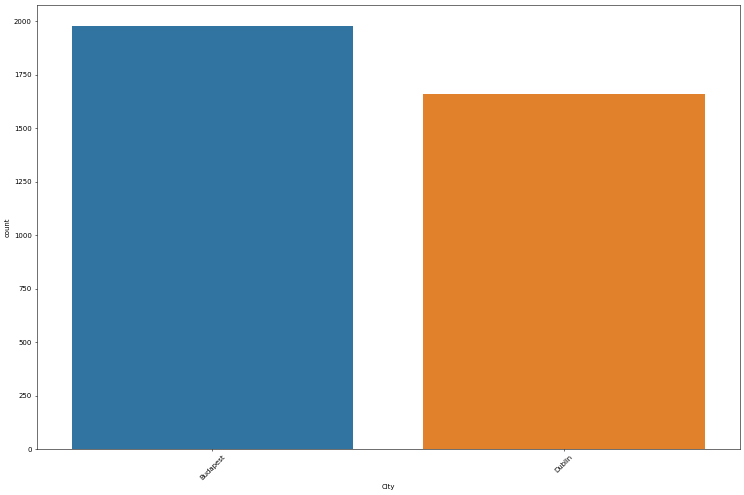

In [24]:
plt.figure(figsize=(15,10), dpi =50)
plot = sns.countplot(data['City'], order=data['City'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.tight_layout()


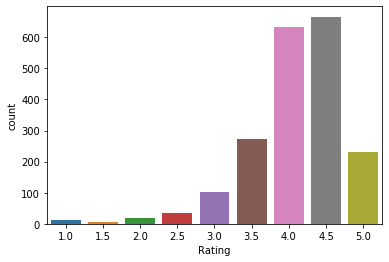

In [25]:
sns.countplot(x='Rating', data = Budapest_Data)

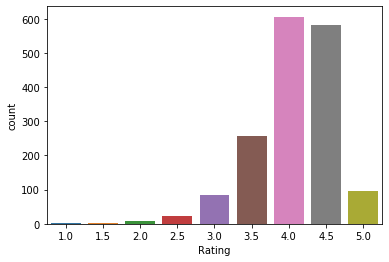

In [26]:
sns.countplot(x='Rating', data = dublin_data)

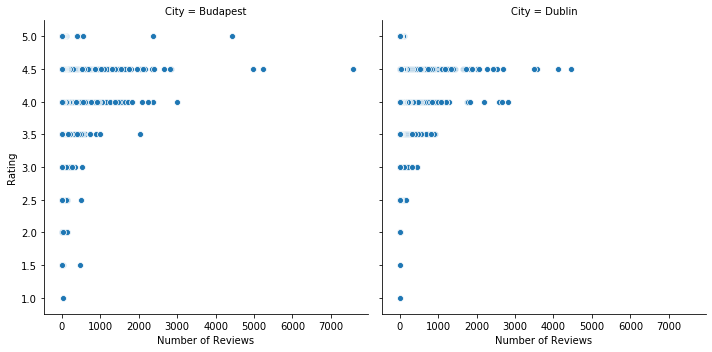

In [27]:
sns.relplot(x="Number of Reviews", y="Rating", col="City",
            data=data);

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


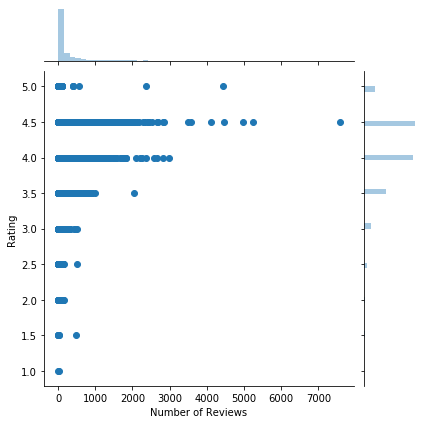

In [28]:
sns.jointplot(x="Number of Reviews", y="Rating", data=data);

/home/jupyterlab/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jupyterlab/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


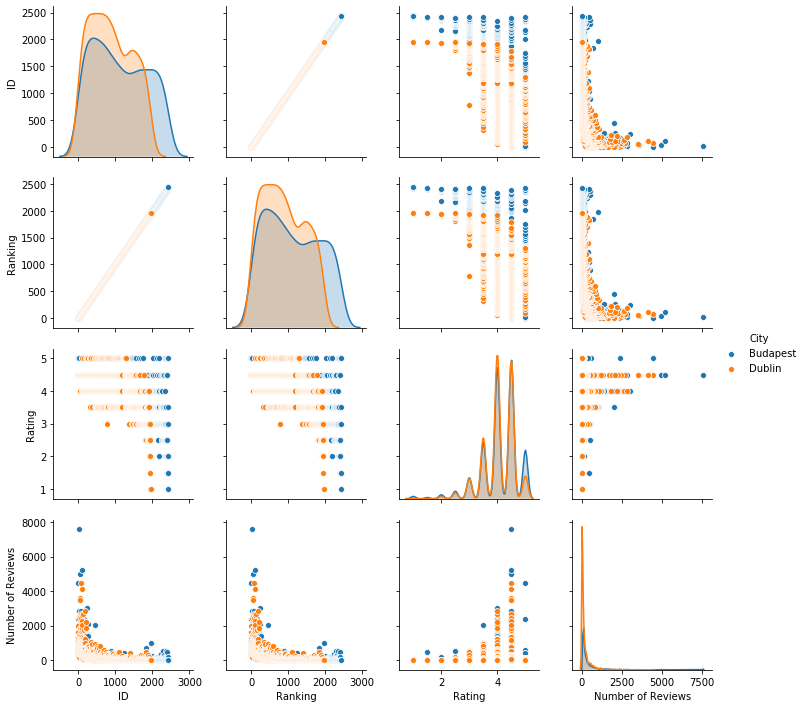

In [29]:
sns.pairplot(data=data, hue="City");

In [31]:
substr = 'Indian'
substrr = 'Chinese'
Dublin_Indian = dublin_data.Food_Style.str.count(substr).sum()
Dublin_Asian = dublin_data.Food_Style.str.count(substrr).sum()
print('The Number of Indian Restaurants  in Budapest are:' + str(Dublin_Indian))

print('The Number of Indian Restaurants in Dublin are:' + str(Dublin_Asian))

The Number of Indian Restaurants  in Budapest are:77
The Number of Indian Restaurants in Dublin are:90


### Results: 
    After having the analysis part and applying certain machine learning algorithms like Principal Component Analysis, we can certainly find the results which are about our problem. Our research was to find the best city to start the new Indian Restaurant from Dublin and Budapest. The results show that it is better to open the restaurant in Dublin than to be in Budapest. After finding out the number of restaurants in Dublin and Budapest, it can be certainly said that it is better to open in Dublin. There are several factors which lead to this interpretation. 
    Consodering the factors like reviews and ratings of other Indian restaurants, it was found that not many people usually visit in the Budapest Indian restaurants. There is actually more Indian population in Dublin, Ireland which leads to the Indian restaurants and they can be measured as a parameter towards the increasing popularity in the Indian Restaurant in Dublin.  Thus, it can be said that Opening the Indian restaurant in Dublin will be profitable than opening it in 
    Budapest. 

### Discussion : 
    Going through the whole project, still there is lots of work to do and lots of work has already been done in this. Getting the data from the Foursquare API and converting that data into the dataframe gives the chance to explore it more. We could have taken the specific Restaurant and could have explored it some more but our research question was different and the reason why we did not took it to further stem. Some future amedments can also be made into this like use of Natural Language Processing or Text mining where the reviews can further be used for the better changes of the restaurants and a different trend can be seen through it. Apart from this, while doing the Exploratory Data Analysis the data was not cleaned so cleaning was done and some missing values was directly taken out of the data as they were below 20% of the data. So they were avoided. Apart from this, Seaborn library was preferred over the matplotlib library as the attractiveness in seaborn library is quite more than that of Matplot Library. Seaborn library was built over Matplotlib. The use of asic librares like Pandas and Numpy was done. Folium library and geocoder were also used in our project. Thus this project giving the output towards the best city for restaurants depending on certain factors which we explored above and analysed it further to get the result.

### Conclusion:
    After performing the whole Data Analysis cycle, the results were satisfying. Out of two cities, there was one city to choose and analysis proved to be vital for this research question. They were good and demanding thus providing the value to the methadology. Foursquare data was extracted using the API. This Data was then again converted into the dataframe. Use of Principal Component Analysis was done to let go few columns which were of no use. Thus giving the desired output which took place after perfroming the tests . This project was vital in terms of Business perspective as now a days the business are growing and restaurant being one of the important part of this plays the major role getting into another city or country to expand their businesses. So, in all these machine learning playes major role giving the absolute solutions to all the major problems. 